In [2]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Source data/veterinary_data.csv") 
df.head(5)


,ID,Owner,Animal,Animal_Type,Age,State,Diagnoses,Treatment
0,1,John Doe,Max,Dog,5,California,Arthritis,Anti-inflammatory drugs
1,2,Jane Smith,Whiskers,Cat,3,Texas,Upper respiratory infection,Antibiotics
2,3,Bob Johnson,Polly,Bird,2,New York,Feather plucking,Behavioral therapy
3,4,Alice Brown,Luna,Dog,7,Florida,Dental disease,Teeth cleaning
4,5,Mike Wilson,Bubbles,Fish,1,Nevada,Fin rot,Salt bath and medication


**Check for Missing or Inconsistent Data**

In [4]:
print(df["Diagnoses"].unique())
print(df["State"].unique())



['Arthritis' 'Upper respiratory infection' 'Feather plucking'
 'Dental disease' 'Fin rot' 'GI stasis' 'Skin allergy' 'Fleas'
 'Metabolic bone disease' 'Heartworm']
['California' 'Texas' 'New York' 'Florida' 'Nevada' 'Oregon' 'Washington'
 'Ohio' 'Georgia' 'Colorado']


In [5]:
print(df["Treatment"].unique())

['Anti-inflammatory drugs' 'Antibiotics' 'Behavioral therapy'
 'Teeth cleaning' 'Salt bath and medication' 'Dietary changes and fluids'
 'Antihistamines' 'Flea treatment' 'Calcium supplements'
 'Heartworm treatment']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           100 non-null    int64 
 1   Owner        100 non-null    object
 2   Animal       100 non-null    object
 3   Animal_Type  100 non-null    object
 4   Age          100 non-null    int64 
 5   State        100 non-null    object
 6   Diagnoses    100 non-null    object
 7   Treatment    100 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [7]:
df = df.drop_duplicates()


In [8]:
df.head()

,ID,Owner,Animal,Animal_Type,Age,State,Diagnoses,Treatment
0,1,John Doe,Max,Dog,5,California,Arthritis,Anti-inflammatory drugs
1,2,Jane Smith,Whiskers,Cat,3,Texas,Upper respiratory infection,Antibiotics
2,3,Bob Johnson,Polly,Bird,2,New York,Feather plucking,Behavioral therapy
3,4,Alice Brown,Luna,Dog,7,Florida,Dental disease,Teeth cleaning
4,5,Mike Wilson,Bubbles,Fish,1,Nevada,Fin rot,Salt bath and medication


EXPLORATIVE DATA ANALYSIS

In [9]:
print(df.describe())

               ID        Age
count  100.000000  100.00000
mean    50.500000    6.45000
std     29.011492    4.16909
min      1.000000    1.00000
25%     25.750000    3.00000
50%     50.500000    5.00000
75%     75.250000   10.00000
max    100.000000   14.00000


In [10]:
print(df["Animal_Type"].value_counts())
print(df["State"].value_counts())


Animal_Type
Dog       20
Fish      20
Rabbit    19
Cat       18
Bird      12
Lizard    11
Name: count, dtype: int64
State
Georgia       16
Florida       12
Oregon        12
Colorado      12
Washington    10
California     8
New York       8
Ohio           8
Texas          7
Nevada         7
Name: count, dtype: int64


VISUALIZE DATA

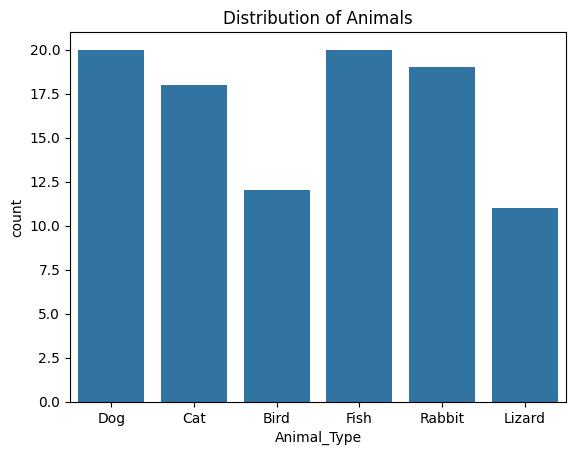

In [11]:
#Animal type distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Animal_Type", data=df)
plt.title("Distribution of Animals")
plt.show()


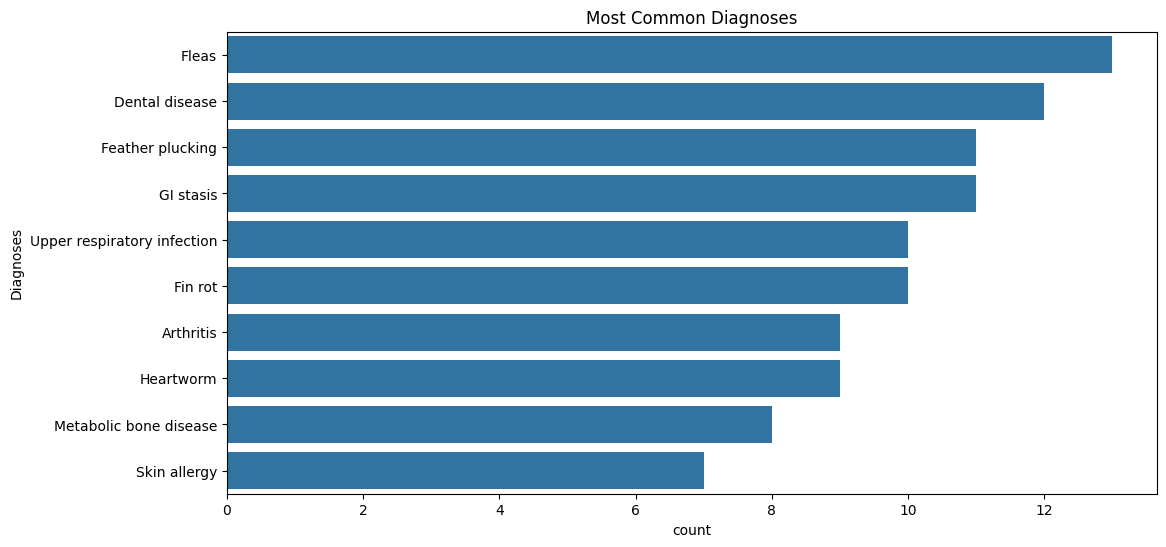

In [ ]:
#Most common diagnoses count
plt.figure(figsize=(12,6))
sns.countplot(y="Diagnoses", data=df, order=df["Diagnoses"].value_counts().index)
plt.title("Most Common Diagnoses")
plt.show()


**DATA INSIGHTS AND PATTERNS**


In [13]:
#Most common health issues by specie

diagnosis_counts = df.groupby("Animal_Type")["Diagnoses"].value_counts()

# Get the most common diagnosis for each animal type
most_common_diagnosis = diagnosis_counts.groupby(level=0).idxmax()
most_common_diagnosis_counts = diagnosis_counts.groupby(level=0).max()

# Combine the results into a DataFrame
result_df = pd.DataFrame({"Most Common Diagnosis": most_common_diagnosis, "Count": most_common_diagnosis_counts})

# Reset index for better readability
result_df.reset_index(inplace=True)

# Display the result
print(result_df)

  Animal_Type   Most Common Diagnosis  Count
0        Bird       (Bird, GI stasis)      2
1         Cat          (Cat, Fin rot)      5
2         Dog        (Dog, Arthritis)      3
3        Fish  (Fish, Dental disease)      3
4      Lizard       (Lizard, Fin rot)      2
5      Rabbit     (Rabbit, GI stasis)      4


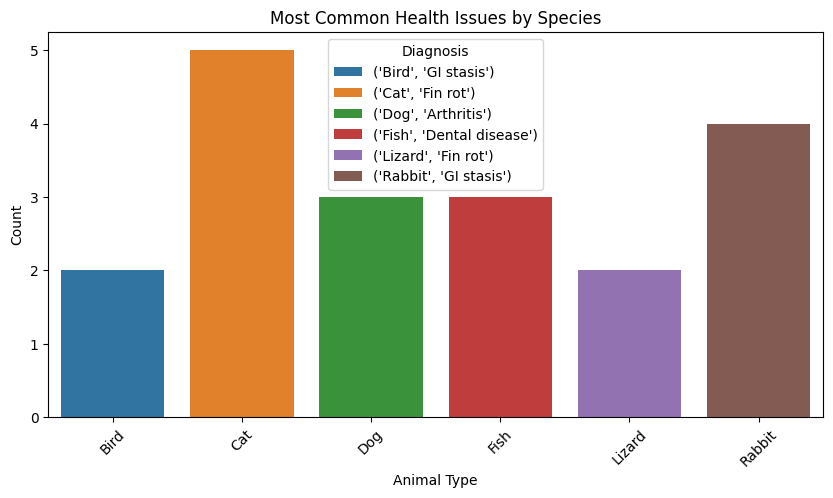

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Animal_Type", y="Count", hue="Most Common Diagnosis", data=result_df)

plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Most Common Health Issues by Species")
plt.xticks(rotation=45)
plt.legend(title="Diagnosis")
plt.show()


In [15]:
# State wise distribution illness

df.groupby("State")["Diagnoses"].value_counts()
# print(df.groupby("State")["Diagnoses"].value_counts().unstack())

State       Diagnoses                  
California  Fleas                          2
            GI stasis                      2
            Arthritis                      1
            Dental disease                 1
            Fin rot                        1
                                          ..
Washington  Heartworm                      2
            Upper respiratory infection    2
            Fleas                          1
            Metabolic bone disease         1
            Skin allergy                   1
Name: count, Length: 66, dtype: int64

In [ ]:
#Effective treatment count per diagnoses

df.groupby("Diagnoses")["Treatment"].value_counts().sort_values(ascending=False).reset_index(name="Count")

,Diagnoses,Treatment,Count
0,Fleas,Teeth cleaning,5
1,Arthritis,Salt bath and medication,3
2,Dental disease,Teeth cleaning,3
3,Feather plucking,Salt bath and medication,3
4,Upper respiratory infection,Antibiotics,3
...,...,...,...
63,Fleas,Heartworm treatment,1
64,GI stasis,Anti-inflammatory drugs,1
65,GI stasis,Antibiotics,1
66,GI stasis,Antihistamines,1


In [22]:
# let's group the data by "Diagnoses" and "Treatment", count occurrences, and reset the index for better structure
treatment_distribution = (
    df.groupby("Diagnoses")["Treatment"]
    .value_counts()
    .sort_values(ascending=False)
    .reset_index(name="Count")
)

# Display the resulting DataFrame for verification
print(treatment_distribution)



                      Diagnoses                 Treatment  Count
0                         Fleas            Teeth cleaning      5
1                     Arthritis  Salt bath and medication      3
2                Dental disease            Teeth cleaning      3
3              Feather plucking  Salt bath and medication      3
4   Upper respiratory infection               Antibiotics      3
..                          ...                       ...    ...
63                        Fleas       Heartworm treatment      1
64                    GI stasis   Anti-inflammatory drugs      1
65                    GI stasis               Antibiotics      1
66                    GI stasis            Antihistamines      1
67  Upper respiratory infection       Heartworm treatment      1

[68 rows x 3 columns]


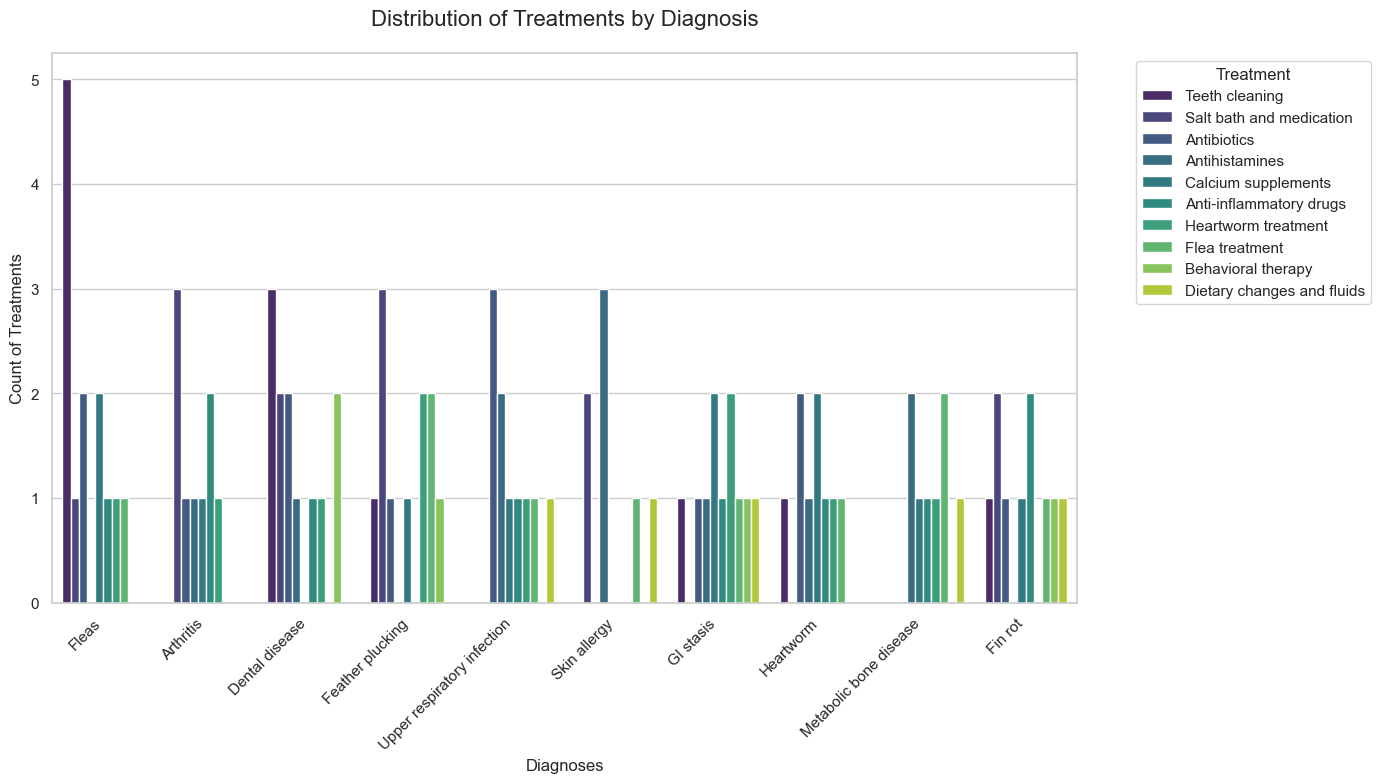

In [ ]:
# visualization
plt.figure(figsize=(14, 8))  # let's Set the figure size for better readability
sns.set_theme(style="whitegrid")  # whitegrid for better readability

# Create a bar plot to visualize the distribution of treatments for each diagnosis
sns.barplot(
    data=treatment_distribution,
    x="Diagnoses",  # X-axis: Diagnoses
    y="Count",      # Y-axis: Count of treatments
    hue="Treatment", # Color bars by Treatment type
    palette="viridis",  # Use a visually appealing color palette
)
# Add plot title and labels
plt.title("Distribution of Treatments by Diagnosis", fontsize=16, pad=20)
plt.xlabel("Diagnoses", fontsize=12)
plt.ylabel("Count of Treatments", fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha="right")

# Add a legend to distinguish treatments
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig("treatment_distribution_by_diagnosis.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

**ADVANCED ANALYSIS**

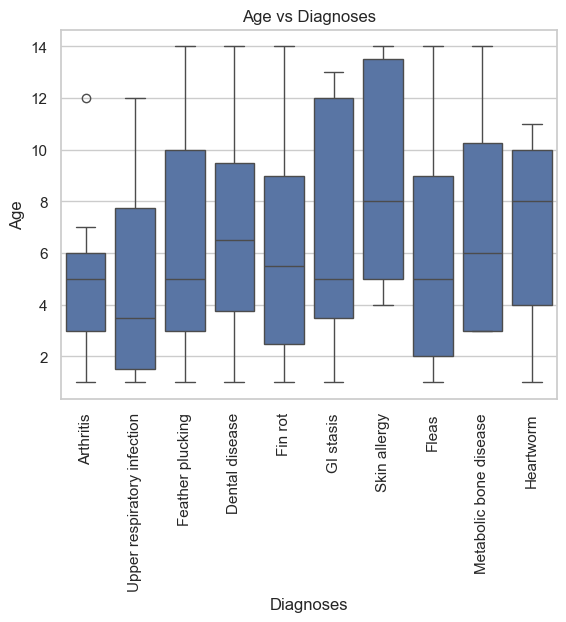

In [29]:
#Correlation between age and diseases

sns.boxplot(x="Diagnoses", y="Age", data=df)
plt.xticks(rotation=90)
plt.title("Age vs Diagnoses")

plt.show()


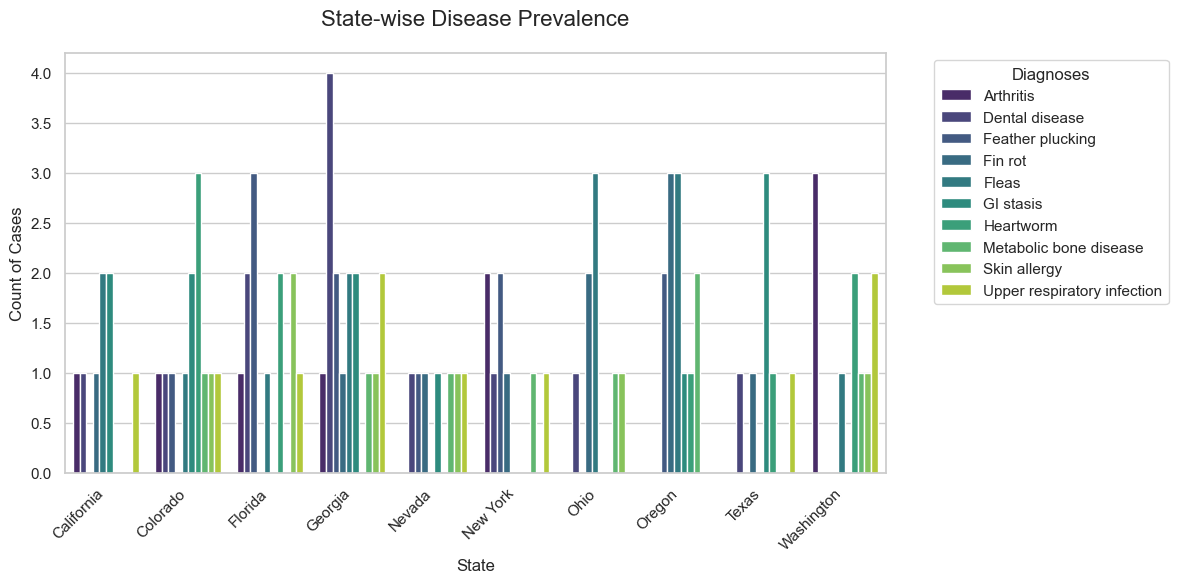

In [ ]:
# let's Create a pivot table to count disease prevalence by state
disease_pivot = df.pivot_table(index="State", columns="Diagnoses", aggfunc="size", fill_value=0)

# Melt the pivot table for better visualization with seaborn
disease_melted = disease_pivot.reset_index().melt(id_vars="State", var_name="Diagnoses", value_name="Count")

# Set up the visualization
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.set_theme(style="whitegrid")  # Use a clean grid style

# Create a grouped bar plot
sns.barplot(
    data=disease_melted,
    x="State",  # X-axis: State
    y="Count",  # Y-axis: Count of diseases
    hue="Diagnoses",  # Group bars by Diagnoses
    palette="viridis",  # Use a visually appealing color palette
)

# Add plot title and labels
plt.title("State-wise Disease Prevalence", fontsize=16, pad=20)
plt.xlabel("State", fontsize=12)
plt.ylabel("Count of Cases", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add a legend to distinguish diagnoses
plt.legend(title="Diagnoses", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**Can we predict the treatment based on diagnoses?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [ ]:
print(df.columns)


In [ ]:

# 🚨 One-Hot Encode Diagnoses
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_diagnoses = pd.DataFrame(encoder.fit_transform(df[["Diagnoses"]]))

# Set column names properly
encoded_diagnoses.columns = encoder.get_feature_names_out(["Diagnoses"])
df = df.join(encoded_diagnoses).drop(columns=["Diagnoses"])  # Remove original Diagnoses column

# ✅ Select Only Diagnoses Features
X = df.filter(like="Diagnoses_")
y = df["Treatment"]

# 🚨 Check if X is still empty
if X.empty:
    raise ValueError("🚨 No valid 'Diagnoses_' columns found! Check dataset preprocessing.")

# Convert target variable to numeric if needed
if y.dtype not in [np.int64, np.float64]:
    y = y.astype("category").cat.codes

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("🚀 Basic Model Accuracy:", accuracy)


In [ ]:
# 🚨 One-Hot Encode Diagnoses
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_diagnoses = pd.DataFrame(encoder.fit_transform(df[["Diagnoses"]]))

# Set column names properly
encoded_diagnoses.columns = encoder.get_feature_names_out(["Diagnoses"])
df = df.join(encoded_diagnoses).drop(columns=["Diagnoses"])  # Remove original Diagnoses column

# 🚨 One-Hot Encode Animal_Type
encoded_animals = pd.get_dummies(df["Animal_Type"], prefix="Animal_Type")
df = df.join(encoded_animals).drop(columns=["Animal_Type"])

# ✅ Standardize Age
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

# ✅ Select Features (Diagnoses + Age + Animal Type)
X = df.filter(like="Diagnoses_").join(df[["Age"] + list(encoded_animals.columns)])
y = df["Treatment"]

# 🚨 Check if X is valid
if X.empty:
    raise ValueError("🚨 No valid feature columns found! Check dataset preprocessing.")

# Convert target variable to numeric if needed
if y.dtype not in [np.int64, np.float64]:
    y = y.astype("category").cat.codes

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("🚀 Improved Model Accuracy:", accuracy)
